In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce   
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix


In [20]:
import warnings
warnings.filterwarnings('ignore')

train_dir='E:/crash_prediction/train.csv'
test_dir='E:/crash_prediction/test.csv'

col=['Severity','Safety_Score','days','complaints','Control_Metric','turbulence','temp','code','Max_Elevation','Violations','weather','id']
df = pd.read_csv(train_dir)
df_test= pd.read_csv(test_dir)

df.columns=col
df_test.columns=col[1:]

df_test.head(5)

,Safety_Score,days,complaints,Control_Metric,turbulence,temp,code,Max_Elevation,Violations,weather,id
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [21]:
train = df.drop( ['id'] ,axis=1)
test = df_test.drop( ['id'] ,axis=1)

train.head(7)

,Severity,Safety_Score,days,complaints,Control_Metric,turbulence,temp,code,Max_Elevation,Violations,weather
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883
5,Minor_Damage_And_Injuries,43.333333,15,0,73.336372,0.432954,78.63,2,29288.448105,1,0.394505
6,Highly_Fatal_And_Damaging,22.009132,15,10,62.853236,0.314671,88.04,4,32342.109345,0,0.058872


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
Severity          10000 non-null object
Safety_Score      10000 non-null float64
days              10000 non-null int64
complaints        10000 non-null int64
Control_Metric    10000 non-null float64
turbulence        10000 non-null float64
temp              10000 non-null float64
code              10000 non-null int64
Max_Elevation     10000 non-null float64
Violations        10000 non-null int64
weather           10000 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 859.5+ KB


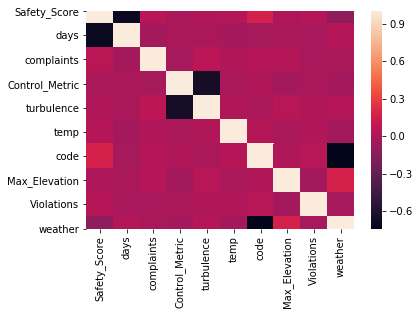

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

corr=train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

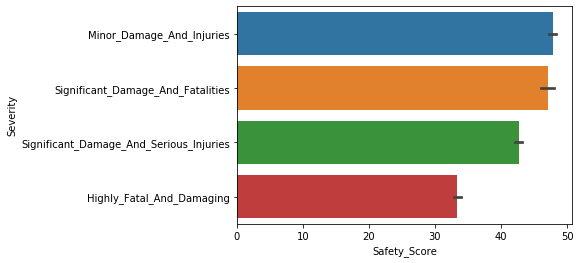

In [24]:
sns.barplot(x='Safety_Score', y='Severity',data=train)
train['Safety_Score']=(train['Safety_Score']-train['Safety_Score'].mean())/train['Safety_Score'].std()
test['Safety_Score']=(test['Safety_Score']-test['Safety_Score'].mean())/test['Safety_Score'].std()

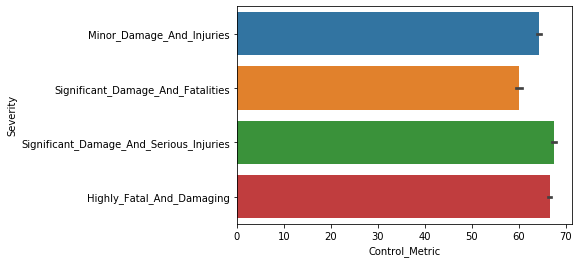

In [25]:
sns.barplot(x='Control_Metric', y='Severity',data=train)
train['Control_Metric']=(train['Control_Metric']-train['Control_Metric'].mean())/train['Control_Metric'].std()
test['Control_Metric']=(test['Control_Metric']-test['Control_Metric'].mean())/test['Control_Metric'].std()

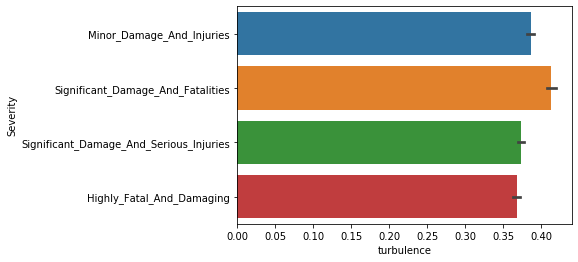

In [26]:
sns.barplot(x='turbulence', y='Severity',data=train)
train['turbulence']=(train['turbulence']-train['turbulence'].mean())/train['turbulence'].std()
test['turbulence']=(test['turbulence']-test['turbulence'].mean())/test['turbulence'].std()

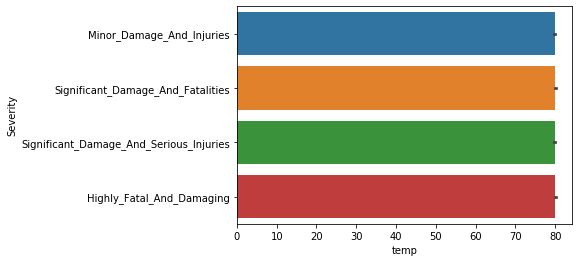

In [27]:
sns.barplot(x='temp', y='Severity',data=train)
train['temp']=(train['temp']-train['temp'].mean())/train['temp'].std()
test['temp']=(test['temp']-test['temp'].mean())/test['temp'].std()

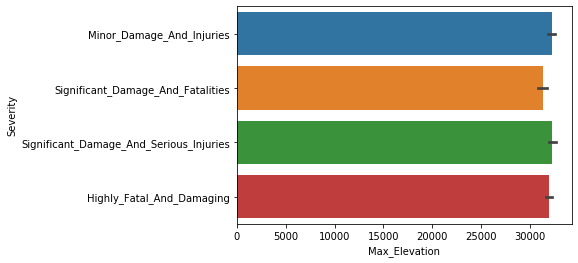

In [28]:
sns.barplot(x='Max_Elevation', y='Severity',data=train)
train['Max_Elevation']=(train['Max_Elevation']-train['Max_Elevation'].mean())/train['Max_Elevation'].std()
test['Max_Elevation']=(test['Max_Elevation']-test['Max_Elevation'].mean())/test['Max_Elevation'].std()

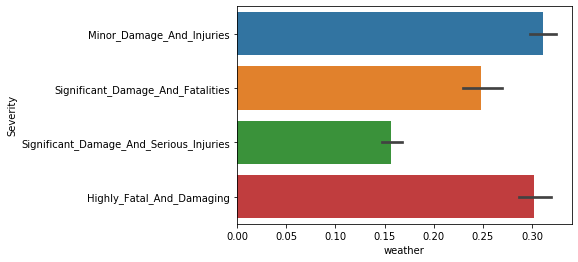

In [29]:
sns.barplot(x='weather', y='Severity',data=train)
train['weather']=(train['weather']-train['weather'].mean())/train['weather'].std()
test['weather']=(test['weather']-test['weather'].mean())/test['weather'].std()

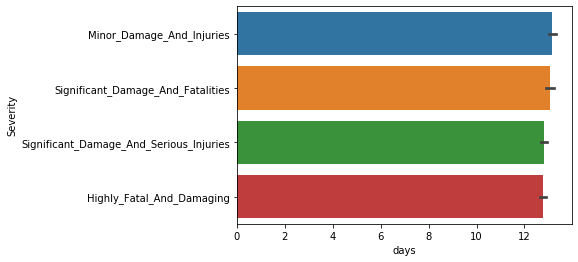

In [30]:
sns.barplot(x='days', y='Severity',data=train)
train['days']=(train['days']-train['days'].mean())/train['days'].std()
test['days']=(test['days']-test['days'].mean())/test['days'].std()

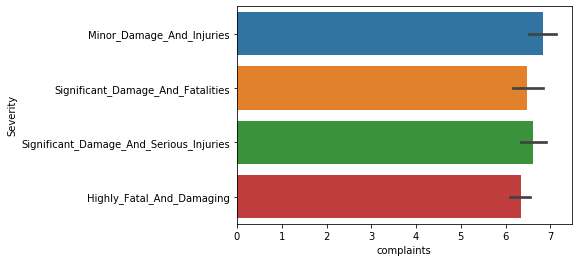

In [31]:
sns.barplot(x='complaints', y='Severity',data=train)
train['complaints']=(train['complaints']-train['complaints'].mean())/train['complaints'].std()
test['complaints']=(test['complaints']-test['complaints'].mean())/test['complaints'].std()

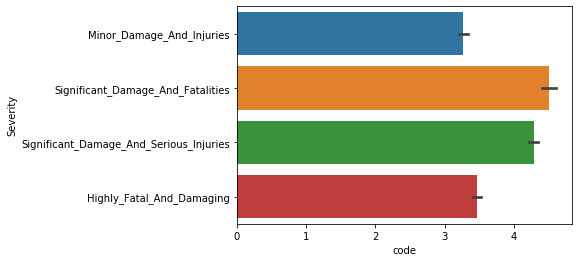

In [32]:
sns.barplot(x='code', y='Severity',data=train)
train['code']=(train['code']-train['code'].mean())/train['code'].std()
test['code']=(test['code']-test['code'].mean())/test['code'].std()

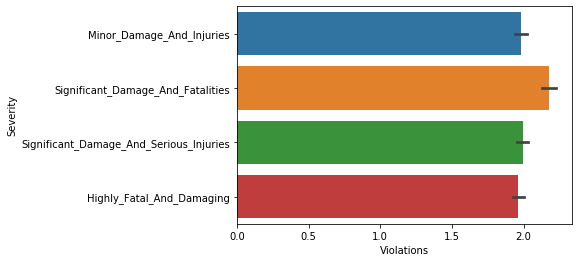

In [33]:
sns.barplot(x='Violations', y='Severity',data=train)
train['Violations']=(train['Violations']-train['Violations'].mean())/train['Violations'].std()
test['Violations']=(test['Violations']-test['Violations'].mean())/test['Violations'].std()

In [34]:
from sklearn.model_selection import train_test_split

X = train.drop(['Severity'], axis = 1)
Y = train['Severity']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state = 10)

##   Different models including regression and classification depending upon problem statement

##  LIST OF LINEAR MODELS 
### LinearRegression for regrresion purpose

In [35]:
# for regression

#from sklearn.linear_model import LinearRegression 
#regressor = LinearRegression()
#regressor.fit(X_Train, Y_Train)
#predictions =regressor.predict(X_Test)
#print(confusion_matrix(Y_Test,predictions))
#print(classification_report(Y_Test,predictions))

### RidgeClassifier/Regrresor and RidgeClassifierCV

###### more info [click](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier)

In [36]:
from sklearn.linear_model import RidgeClassifier
Ridge_classifier = RidgeClassifier(alpha=10,solver='svd').fit(X_Train, Y_Train)
predictions =Ridge_classifier.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions))

[[530  91  16   1]
 [ 36 353  36  65]
 [151  77  72  38]
 [254  88  45 147]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.55      0.83      0.66       638
              Minor_Damage_And_Injuries       0.58      0.72      0.64       490
      Significant_Damage_And_Fatalities       0.43      0.21      0.28       338
Significant_Damage_And_Serious_Injuries       0.59      0.28      0.37       534

                               accuracy                           0.55      2000
                              macro avg       0.53      0.51      0.49      2000
                           weighted avg       0.54      0.55      0.52      2000



In [37]:
from sklearn.linear_model import RidgeClassifierCV
Ridge_cv = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1,10]).fit(X_Train, Y_Train)
predictions1 =Ridge_cv.predict(X_Test)
print(confusion_matrix(Y_Test,predictions1))
print(classification_report(Y_Test,predictions1))

[[530  91  16   1]
 [ 36 353  36  65]
 [151  77  72  38]
 [254  88  45 147]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.55      0.83      0.66       638
              Minor_Damage_And_Injuries       0.58      0.72      0.64       490
      Significant_Damage_And_Fatalities       0.43      0.21      0.28       338
Significant_Damage_And_Serious_Injuries       0.59      0.28      0.37       534

                               accuracy                           0.55      2000
                              macro avg       0.53      0.51      0.49      2000
                           weighted avg       0.54      0.55      0.52      2000



### Lasso and LassoCV regression/classification

###### more info [click](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV)

In [38]:
#from sklearn import linear_model
#clf_lasso = linear_model.Lasso(alpha=0.1)
#clf_lasso.fit(X_Train, Y_Train)
#predictions2 =Ridge_cv.predict(X_Test)
#print(confusion_matrix(Y_Test,predictions2))
#print(classification_report(Y_Test,predictions2))

In [39]:
#from sklearn.linear_model import LassoCV
#lassocv = LassoCV(cv=5, random_state=0).fit(X_Train, Y_Train)
#predictions3 =lassocv.predict(X_Test)
#print(confusion_matrix(Y_Test,predictions3))
#print(classification_report(Y_Test,predictions3))

### Multi-task Lasso

In [40]:
#from sklearn import linear_model
#multi_lasso = linear_model.MultiTaskLasso(alpha=0.1)
#multi_lasso.fit(X_Train, Y_Train)
#predictions4 =lassocv.predict(X_Test)
#print(confusion_matrix(Y_Test,predictions4))
#print(classification_report(Y_Test,predictions4))

### ElasticNet

###### more info [click](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn-linear-model-elasticnet)

In [41]:
#from sklearn.linear_model import ElasticNet
#elastic_net = ElasticNet(alpha=0.75,l1_ratio=0.5,random_state=0)
#elastic_net.fit(X_Train, Y_Train)
#predictions5 =elastic_net.predict(X_Test)
#print(confusion_matrix(Y_Test,predictions5))
#print(classification_report(Y_Test,predictions5))

## More on Regression

#### Linear models [click](https://scikit-learn.org/stable/modules/linear_model.html#)


#### CV stands for cross validation estimators --- automatically selects best hyperparametre [click](https://scikit-learn.org/stable/glossary.html#term-cross-validation-estimator)

### Logistic regression/ Logistic regressionCV

###### more info  [click](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV)

In [42]:
from sklearn.linear_model import LogisticRegression
trainedmodel = LogisticRegression(penalty='l2',C=1.0,solver='sag').fit(X_Train,Y_Train)
predictions6 =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions6))
print(classification_report(Y_Test,predictions6))

[[528  84  23   3]
 [  8 340  46  96]
 [149  69  77  43]
 [ 99  97  54 284]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.67      0.83      0.74       638
              Minor_Damage_And_Injuries       0.58      0.69      0.63       490
      Significant_Damage_And_Fatalities       0.39      0.23      0.29       338
Significant_Damage_And_Serious_Injuries       0.67      0.53      0.59       534

                               accuracy                           0.61      2000
                              macro avg       0.58      0.57      0.56      2000
                           weighted avg       0.60      0.61      0.60      2000



In [43]:
from sklearn.linear_model import LogisticRegressionCV
logisticRegressionCV = LogisticRegression().fit(X_Train,Y_Train)
predictions7 =logisticRegressionCV.predict(X_Test)
print(confusion_matrix(Y_Test,predictions7))
print(classification_report(Y_Test,predictions7))

[[528  84  23   3]
 [  8 340  47  95]
 [149  69  77  43]
 [100  97  54 283]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.67      0.83      0.74       638
              Minor_Damage_And_Injuries       0.58      0.69      0.63       490
      Significant_Damage_And_Fatalities       0.38      0.23      0.29       338
Significant_Damage_And_Serious_Injuries       0.67      0.53      0.59       534

                               accuracy                           0.61      2000
                              macro avg       0.57      0.57      0.56      2000
                           weighted avg       0.60      0.61      0.60      2000



### SGDClassifier

###### more info [click](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)

In [44]:
from sklearn import linear_model
sgd_classifier = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
sgd_classifier.fit(X_Train,Y_Train)
predictions8 =sgd_classifier.predict(X_Test)
print(confusion_matrix(Y_Test,predictions8))
print(classification_report(Y_Test,predictions8))

[[526  83  27   2]
 [ 14 357  90  29]
 [151 108  75   4]
 [120 206 104 104]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.65      0.82      0.73       638
              Minor_Damage_And_Injuries       0.47      0.73      0.57       490
      Significant_Damage_And_Fatalities       0.25      0.22      0.24       338
Significant_Damage_And_Serious_Injuries       0.75      0.19      0.31       534

                               accuracy                           0.53      2000
                              macro avg       0.53      0.49      0.46      2000
                           weighted avg       0.57      0.53      0.49      2000



### Perceptron

###### more info [click](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)

In [45]:
from sklearn.linear_model import Perceptron
percep= Perceptron(tol=1e-3, random_state=0)
percep.fit(X_Train,Y_Train)
predictions9 =sgd_classifier.predict(X_Test)
print(confusion_matrix(Y_Test,predictions9))
print(classification_report(Y_Test,predictions9))

[[526  83  27   2]
 [ 14 357  90  29]
 [151 108  75   4]
 [120 206 104 104]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.65      0.82      0.73       638
              Minor_Damage_And_Injuries       0.47      0.73      0.57       490
      Significant_Damage_And_Fatalities       0.25      0.22      0.24       338
Significant_Damage_And_Serious_Injuries       0.75      0.19      0.31       534

                               accuracy                           0.53      2000
                              macro avg       0.53      0.49      0.46      2000
                           weighted avg       0.57      0.53      0.49      2000



## SVM 

more info [click](https://scikit-learn.org/stable/modules/svm.html)

### svm.SVC

###### more info  [click] (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [46]:
from sklearn.svm import SVC
svc_clf = SVC(gamma='auto',C=10,kernel='rbf',decision_function_shape='ovo').fit(X_Train,Y_Train)
predictions10 =svc_clf.predict(X_Test)
print(confusion_matrix(Y_Test,predictions10))
print(classification_report(Y_Test,predictions10))

[[564  37  20  17]
 [ 18 448   8  16]
 [ 12   3 315   8]
 [ 22  20  12 480]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.92      0.88      0.90       638
              Minor_Damage_And_Injuries       0.88      0.91      0.90       490
      Significant_Damage_And_Fatalities       0.89      0.93      0.91       338
Significant_Damage_And_Serious_Injuries       0.92      0.90      0.91       534

                               accuracy                           0.90      2000
                              macro avg       0.90      0.91      0.90      2000
                           weighted avg       0.90      0.90      0.90      2000



### svm.LinearSVC

more info [click](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

In [47]:
from sklearn import svm
trainedsvm = svm.LinearSVC(C=10,penalty='l2',multi_class='crammer_singer').fit(X_Train, Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
print(confusion_matrix(Y_Test,predictionsvm))
print(classification_report(Y_Test,predictionsvm))

[[528  96  11   3]
 [  6 414  28  42]
 [151 133  49   5]
 [185 225  54  70]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.61      0.83      0.70       638
              Minor_Damage_And_Injuries       0.48      0.84      0.61       490
      Significant_Damage_And_Fatalities       0.35      0.14      0.20       338
Significant_Damage_And_Serious_Injuries       0.58      0.13      0.21       534

                               accuracy                           0.53      2000
                              macro avg       0.50      0.49      0.43      2000
                           weighted avg       0.52      0.53      0.46      2000



### smv.SVR
for regression

more info [click](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)

In [48]:
#from sklearn.svm import SVR
#clf_svr = SVR(C=1.0, epsilon=0.2)
#clf_svr.fit(X_Train, Y_Train)

## KNN

more info [click](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4,algorithm='auto')
knn.fit(X_Train, Y_Train)
Y_pred = knn.predict(X_Test)
print(confusion_matrix(Y_Test,Y_pred))
print(classification_report(Y_Test,Y_pred))

[[489  58  22  69]
 [ 57 344  26  63]
 [ 51  59 221   7]
 [ 87  66  13 368]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.71      0.77      0.74       638
              Minor_Damage_And_Injuries       0.65      0.70      0.68       490
      Significant_Damage_And_Fatalities       0.78      0.65      0.71       338
Significant_Damage_And_Serious_Injuries       0.73      0.69      0.71       534

                               accuracy                           0.71      2000
                              macro avg       0.72      0.70      0.71      2000
                           weighted avg       0.71      0.71      0.71      2000



### radius neighbours classifier

more info [click](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier)



## for regression purposes with similar approach

[click](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression)

### GaussianProcessClassifier

In [50]:
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
#kernel = 1.0 * RBF(1.0)
#gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(X_Train, Y_Train)
#prediction11 = gpc.predict(X_Test)
#print(confusion_matrix(Y_Test,prediction11))
#print(classification_report(Y_Test,prediction11))

# EXPENSIVE OPERATION

### GaussianNB

In [51]:
from sklearn.naive_bayes import GaussianNB
trainednb = GaussianNB().fit(X_Train, Y_Train)
predictionnb = trainednb.predict(X_Test)
print(confusion_matrix(Y_Test,predictionnb))
print(classification_report(Y_Test,predictionnb))

[[309  76  24 229]
 [ 78 234  32 146]
 [ 82  39  79 138]
 [107  51  55 321]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.54      0.48      0.51       638
              Minor_Damage_And_Injuries       0.58      0.48      0.53       490
      Significant_Damage_And_Fatalities       0.42      0.23      0.30       338
Significant_Damage_And_Serious_Injuries       0.38      0.60      0.47       534

                               accuracy                           0.47      2000
                              macro avg       0.48      0.45      0.45      2000
                           weighted avg       0.49      0.47      0.47      2000



## Different types of naive bayes

[click](https://scikit-learn.org/stable/modules/naive_bayes.html)

## DecisionTreeClassifier

more info [click](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(random_state=10,max_features=10,max_depth=3)
DT_clf.fit(X_Train, Y_Train)
predictionDT = trainednb.predict(X_Test)
print(confusion_matrix(Y_Test,predictionDT))
print(classification_report(Y_Test,predictionDT))

[[309  76  24 229]
 [ 78 234  32 146]
 [ 82  39  79 138]
 [107  51  55 321]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.54      0.48      0.51       638
              Minor_Damage_And_Injuries       0.58      0.48      0.53       490
      Significant_Damage_And_Fatalities       0.42      0.23      0.30       338
Significant_Damage_And_Serious_Injuries       0.38      0.60      0.47       534

                               accuracy                           0.47      2000
                              macro avg       0.48      0.45      0.45      2000
                           weighted avg       0.49      0.47      0.47      2000



## Ensemble methods

### GradientBoostingClassifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=900, learning_rate = learning_rate, max_features=10, max_depth = 2, random_state = 10)
    gb.fit(X_Train, Y_Train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_Train, Y_Train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_Test, Y_Test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.908
Accuracy score (validation): 0.880

Learning rate:  0.1
Accuracy score (training): 0.965
Accuracy score (validation): 0.915

Learning rate:  0.25
Accuracy score (training): 0.999
Accuracy score (validation): 0.946

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.951

Learning rate:  0.75
Accuracy score (training): 0.991
Accuracy score (validation): 0.929

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.957



In [54]:
gb = GradientBoostingClassifier(n_estimators=1100, learning_rate = 0.90, max_features=10, max_depth = 2, random_state = 10)
gb.fit(X_Train, Y_Train)
predictions = gb.predict(X_Test)

print("Confusion Matrix:")
print(confusion_matrix(Y_Test, predictions))
print()
print("Classification Report")
print(classification_report(Y_Test, predictions))

Confusion Matrix:
[[598  17  12  11]
 [  8 461  10  11]
 [  5   2 330   1]
 [ 12   9  11 502]]

Classification Report
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.96      0.94      0.95       638
              Minor_Damage_And_Injuries       0.94      0.94      0.94       490
      Significant_Damage_And_Fatalities       0.91      0.98      0.94       338
Significant_Damage_And_Serious_Injuries       0.96      0.94      0.95       534

                               accuracy                           0.95      2000
                              macro avg       0.94      0.95      0.94      2000
                           weighted avg       0.95      0.95      0.95      2000



### BaggingClassifier

In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors = 4,algorithm='auto'),max_samples=0.5, max_features=0.5,random_state=10).fit(X_Train, Y_Train)
prediction_bag = bagging.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_bag))
print(classification_report(Y_Test,prediction_bag))

[[552  58  13  15]
 [ 36 395  20  39]
 [ 34  39 251  14]
 [ 48  31  13 442]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.82      0.87      0.84       638
              Minor_Damage_And_Injuries       0.76      0.81      0.78       490
      Significant_Damage_And_Fatalities       0.85      0.74      0.79       338
Significant_Damage_And_Serious_Injuries       0.87      0.83      0.85       534

                               accuracy                           0.82      2000
                              macro avg       0.82      0.81      0.82      2000
                           weighted avg       0.82      0.82      0.82      2000



### RandomForestClassifier

more info [click](https://scikit-learn.org/stable/modules/ensemble.html#random-forest-parameters)

In [56]:
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier(n_estimators=800,random_state=42,max_features=0.8,max_depth=10).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[606  13   9  10]
 [ 12 468   8   2]
 [  1  11 324   2]
 [ 13  32   1 488]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.96      0.95      0.95       638
              Minor_Damage_And_Injuries       0.89      0.96      0.92       490
      Significant_Damage_And_Fatalities       0.95      0.96      0.95       338
Significant_Damage_And_Serious_Injuries       0.97      0.91      0.94       534

                               accuracy                           0.94      2000
                              macro avg       0.94      0.94      0.94      2000
                           weighted avg       0.94      0.94      0.94      2000



### ExtraTreesClassifier

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
clf_extra_tree = ExtraTreesClassifier(n_estimators=900,random_state=42,max_features='sqrt')
clf_extra_tree.fit(X_Train,Y_Train)
predictionforest_extra = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest_extra))
print(classification_report(Y_Test,predictionforest_extra))

[[606  13   9  10]
 [ 12 468   8   2]
 [  1  11 324   2]
 [ 13  32   1 488]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.96      0.95      0.95       638
              Minor_Damage_And_Injuries       0.89      0.96      0.92       490
      Significant_Damage_And_Fatalities       0.95      0.96      0.95       338
Significant_Damage_And_Serious_Injuries       0.97      0.91      0.94       534

                               accuracy                           0.94      2000
                              macro avg       0.94      0.94      0.94      2000
                           weighted avg       0.94      0.94      0.94      2000



###  ADa Boost

In [58]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(n_estimators=700, random_state=0)
clf_ada.fit(X_Train,Y_Train)
prediction_ada = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_ada))
print(classification_report(Y_Test,prediction_ada))

[[606  13   9  10]
 [ 12 468   8   2]
 [  1  11 324   2]
 [ 13  32   1 488]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.96      0.95      0.95       638
              Minor_Damage_And_Injuries       0.89      0.96      0.92       490
      Significant_Damage_And_Fatalities       0.95      0.96      0.95       338
Significant_Damage_And_Serious_Injuries       0.97      0.91      0.94       534

                               accuracy                           0.94      2000
                              macro avg       0.94      0.94      0.94      2000
                           weighted avg       0.94      0.94      0.94      2000



### HistGradientBoostingClassifier

more info [click](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html#sklearn.ensemble.HistGradientBoostingClassifier)

### Using the VotingClassifier with GridSearchCV
[click](https://scikit-learn.org/stable/modules/ensemble.html#using-the-votingclassifier-with-gridsearchcv)

### OneVsRestClassifier

more info [click](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)

In [59]:
from sklearn.multiclass import OneVsRestClassifier
clf_ovr = OneVsRestClassifier(gb).fit(X_Train,Y_Train)
prediction_ovr = clf_ovr.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_ovr))
print(classification_report(Y_Test,prediction_ovr))

[[598  12  14  14]
 [  8 463  13   6]
 [  4   5 321   8]
 [  9   5  14 506]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.97      0.94      0.95       638
              Minor_Damage_And_Injuries       0.95      0.94      0.95       490
      Significant_Damage_And_Fatalities       0.89      0.95      0.92       338
Significant_Damage_And_Serious_Injuries       0.95      0.95      0.95       534

                               accuracy                           0.94      2000
                              macro avg       0.94      0.94      0.94      2000
                           weighted avg       0.94      0.94      0.94      2000



### OneVsOneClassifier

In [60]:
from sklearn.multiclass import OneVsOneClassifier
clf_ovo = OneVsOneClassifier(gb).fit(X_Train,Y_Train)
prediction_ovo = clf_ovo.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_ovo))
print(classification_report(Y_Test,prediction_ovo))

[[610  15   9   4]
 [ 11 473   4   2]
 [  5   2 331   0]
 [ 16  10   2 506]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.95      0.96      0.95       638
              Minor_Damage_And_Injuries       0.95      0.97      0.96       490
      Significant_Damage_And_Fatalities       0.96      0.98      0.97       338
Significant_Damage_And_Serious_Injuries       0.99      0.95      0.97       534

                               accuracy                           0.96      2000
                              macro avg       0.96      0.96      0.96      2000
                           weighted avg       0.96      0.96      0.96      2000



In [61]:
from sklearn.multiclass import OutputCodeClassifier
clf_occ = OutputCodeClassifier(trainedforest).fit(X_Train,Y_Train)
prediction_occ = clf_occ.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_occ))
print(classification_report(Y_Test,prediction_occ))

[[620   9   9   0]
 [ 14 468   8   0]
 [  3   8 327   0]
 [521  12   1   0]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.54      0.97      0.69       638
              Minor_Damage_And_Injuries       0.94      0.96      0.95       490
      Significant_Damage_And_Fatalities       0.95      0.97      0.96       338
Significant_Damage_And_Serious_Injuries       0.00      0.00      0.00       534

                               accuracy                           0.71      2000
                              macro avg       0.61      0.72      0.65      2000
                           weighted avg       0.56      0.71      0.61      2000



### isotonic regression

[click](https://scikit-learn.org/stable/modules/generated/sklearn.isotonic.IsotonicRegression.html#sklearn.isotonic.IsotonicRegression)

### MLPClassifier

more info [click](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [62]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='sgd', alpha=1e-3,hidden_layer_sizes=(256, 128, 64 , 4), random_state=10)
clf_mlp.fit(X_Train,Y_Train)
prediction_mlp = clf_mlp.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_mlp))
print(classification_report(Y_Test,prediction_mlp))

[[597  15  15  11]
 [ 13 468   4   5]
 [  6   5 326   1]
 [ 27  18   4 485]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.93      0.94      0.93       638
              Minor_Damage_And_Injuries       0.92      0.96      0.94       490
      Significant_Damage_And_Fatalities       0.93      0.96      0.95       338
Significant_Damage_And_Serious_Injuries       0.97      0.91      0.94       534

                               accuracy                           0.94      2000
                              macro avg       0.94      0.94      0.94      2000
                           weighted avg       0.94      0.94      0.94      2000



### GridSearchCV

more info [click](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search)

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

### LinearDiscriminantAnalysis

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
trainedlda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto').fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
print(confusion_matrix(Y_Test,predictionlda))
print(classification_report(Y_Test,predictionlda))

[[528  81  25   4]
 [  7 338  47  98]
 [149  69  99  21]
 [ 62  70  54 348]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.71      0.83      0.76       638
              Minor_Damage_And_Injuries       0.61      0.69      0.65       490
      Significant_Damage_And_Fatalities       0.44      0.29      0.35       338
Significant_Damage_And_Serious_Injuries       0.74      0.65      0.69       534

                               accuracy                           0.66      2000
                              macro avg       0.62      0.62      0.61      2000
                           weighted avg       0.65      0.66      0.65      2000



## XGBOOST + hyperparametre searching

In [124]:
import xgboost
classifier2=xgboost.XGBClassifier()

In [125]:
classifier2.fit(X_Train, Y_Train)
prediction_xg0 = classifier2.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_xg0))
print(classification_report(Y_Test,prediction_xg0))

[[530  87  11  10]
 [ 19 413  29  29]
 [ 11  22 281  24]
 [ 15  56   4 459]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.92      0.83      0.87       638
              Minor_Damage_And_Injuries       0.71      0.84      0.77       490
      Significant_Damage_And_Fatalities       0.86      0.83      0.85       338
Significant_Damage_And_Serious_Injuries       0.88      0.86      0.87       534

                               accuracy                           0.84      2000
                              macro avg       0.85      0.84      0.84      2000
                           weighted avg       0.85      0.84      0.84      2000



In [111]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
classifier=xgboost.XGBClassifier()

In [112]:
params={
 "learning_rate"    : [0.05, 0.10, 0.20, 0.25, 0.30,0.50] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [100,300,500,700,800,1000]
    
}

In [113]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [114]:
random_search.fit(X_Train, Y_Train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:   27.2s remaining:   34.6s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:   29.3s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   32.4s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                           

In [115]:
prediction_xg = random_search.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_xg))
print(classification_report(Y_Test,prediction_xg))

[[604  18   9   7]
 [  9 474   5   2]
 [  3   0 334   1]
 [ 13  11   2 508]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.96      0.95      0.95       638
              Minor_Damage_And_Injuries       0.94      0.97      0.95       490
      Significant_Damage_And_Fatalities       0.95      0.99      0.97       338
Significant_Damage_And_Serious_Injuries       0.98      0.95      0.97       534

                               accuracy                           0.96      2000
                              macro avg       0.96      0.96      0.96      2000
                           weighted avg       0.96      0.96      0.96      2000



In [135]:
#prediction_xg_final=classifier.predict(test)
#submission = pd.DataFrame({
 #       "Accident_ID": df_test["id"],
  #      "Severity": prediction_xg_final
   # })
#submission.to_csv('E:/crash_prediction/s5.csv', index=False)

In [116]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [117]:
random_search.best_params_

{'n_estimators': 1000,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [118]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [119]:
classifier.fit(X_Train, Y_Train)
prediction_xg1 = classifier.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_xg1))
print(classification_report(Y_Test,prediction_xg1))


[[604  18   9   7]
 [  9 474   5   2]
 [  3   0 334   1]
 [ 13  11   2 508]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.96      0.95      0.95       638
              Minor_Damage_And_Injuries       0.94      0.97      0.95       490
      Significant_Damage_And_Fatalities       0.95      0.99      0.97       338
Significant_Damage_And_Serious_Injuries       0.98      0.95      0.97       534

                               accuracy                           0.96      2000
                              macro avg       0.96      0.96      0.96      2000
                           weighted avg       0.96      0.96      0.96      2000



In [134]:
#prediction_xg1_final=classifier.predict(test)
#submission = pd.DataFrame({
 #       "Accident_ID": df_test["id"],
  #      "Severity": prediction_xg1_final
   # })
#submission.to_csv('E:/crash_prediction/s4.csv', index=False)

### XGBRFClassifier

[click](https://xgboost.readthedocs.io/en/latest/tutorials/rf.html#standalone-random-forest-with-scikit-learn-like-api)

In [120]:
classifier_rf=xgboost.XGBRFClassifier()

In [121]:
random_search1=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [122]:
random_search1.fit(X_Train, Y_Train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:   24.8s remaining:   31.6s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:   30.1s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   49.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=0.7, gamma=0.2,
                                           learning_rate=0.05, max_delta_step=0,
                                           max_depth=4, min_child_weight=1,
                                           missing=None, n_estimators=1000,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_al...
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                           

In [123]:
classifier_rf.fit(X_Train, Y_Train)
prediction_xg2 = classifier_rf.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_xg2))
print(classification_report(Y_Test,prediction_xg2))

[[449 111  35  43]
 [ 21 344  74  51]
 [ 31  46 216  45]
 [ 58  80  12 384]]
                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.80      0.70      0.75       638
              Minor_Damage_And_Injuries       0.59      0.70      0.64       490
      Significant_Damage_And_Fatalities       0.64      0.64      0.64       338
Significant_Damage_And_Serious_Injuries       0.73      0.72      0.73       534

                               accuracy                           0.70      2000
                              macro avg       0.69      0.69      0.69      2000
                           weighted avg       0.71      0.70      0.70      2000

